# 📘 Modul: Pengenalan Face Detection dengan MediaPipe

## 📌 Pengantar: Face Detection dengan MediaPipe
Face Detection (deteksi wajah) adalah proses mengenali dan menemukan lokasi wajah manusia dalam gambar atau video. Ini adalah langkah awal penting dalam berbagai aplikasi seperti:
- Pengenalan wajah (face recognition)
- Analisis ekspresi wajah
- Pelacakan wajah
- Augmented reality (misalnya filter wajah)

## 🎯 Apa Itu MediaPipe?
MediaPipe adalah framework open-source dari Google yang dirancang untuk membangun pipeline pemrosesan media secara real-time, seperti visi komputer dan pengolahan audio. MediaPipe menyediakan model deteksi wajah yang ringan, akurat, dan cepat, yang dapat digunakan baik untuk gambar statis maupun video streaming real-time.

### Modul

In [ ]:
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

**Penjelasan:**
- `os`: Digunakan untuk mengakses dan memanipulasi path/file sistem operasi, misalnya untuk menyusun path ke file gambar/video 
- `glob`: Berguna untuk mencari file berdasarkan pola tertentu, misalnya semua file .jpg di folder
- `cv2`: Digunakan untuk melakukan operasi pemrosesan gambar, seperti membaca, menampilkan, dan memanipulasi gambar/video`
- `numpy`: Digunakan untuk operasi numerik dan manipulasi array, sangat penting dalam pemrosesan gambar dan analisis data
- `matplotlib`: Digunakan untuk visualisasi data dan menampilkan gambar, sangat berguna untuk memvisualisasikan hasil pemrosesan gambar
- `mediapipe`: Digunakan untuk mendeteksi dan melacak objek dalam gambar atau video, sangat berguna dalam aplikasi seperti pengenalan wajah dan pose

### Pada Gambar

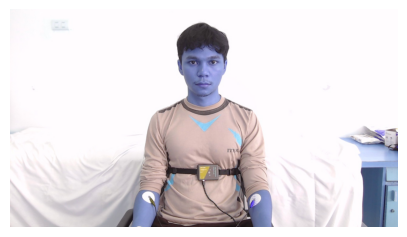

In [2]:
IMG_PATH = os.path.join(os.getcwd(), 'data', 'sample_toby.jpg')

# Load the image
img = cv2.imread(IMG_PATH)

# show the image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

Tampaknya kita perlu mengubah warna gambar dari BGR menjadi RGB.

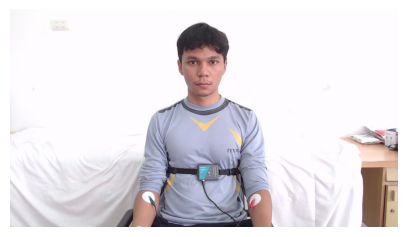

In [3]:
# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


Deteksi dengan Mediapipe

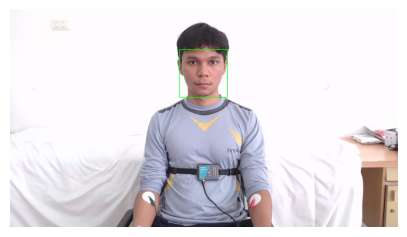

In [4]:
# Inisialisasi Face Detection dari MediaPipe
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Inisialisasi Detector Wajah
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# Proses Wajah pada Gambar
results = face_detection.process(img_rgb)

# Mengecek apakah ada wajah yang terdeteksi
if results.detections:
    boxes = []         # List untuk menyimpan koordinat bounding box
    
    # Loop untuk setiap wajah yang terdeteksi
    for detection in results.detections:
        # Mengambil koordinat bounding box
        bboxC = detection.location_data.relative_bounding_box # Koordinat box relatif terhadap ukuran gambar (dalam nilai antara 0 dan 1)

        # Mengambil tinggi dan lebar gambar asli
        ih, iw, _ = img.shape

        # Mengubah koordinat relatif menjadi koordinat piksel absolut dengan mengalikan dengan dimensi gambar
        x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
        
        # Menyimpan bounding box ke dalam list
        boxes.append([x, y, w, h])

        # Menggambar bounding box pada gambar asli
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Tampilkan gambar dengan bounding box
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

else:
    print(f"No faces detected")
    cv2.destroyAllWindows()
    exit()

**Penjelasan:**

1. Inisialisasi Komponen dari MediaPipe:
    - `mp.solutions.face_detection`: Modul dari MediaPipe untuk deteksi wajah
    - `mp.solutions.drawing_utils`: Utilitas untuk menggambar anotasi pada gambar (tidak digunakan dalam kode ini, tapi biasanya dipakai untuk menambahkan visualisasi seperti keypoints atau bounding box).
2.  Inisialisasi Detektor Wajah:
    - `model_selection=1`: Gunakan model yang lebih akurat, cocok untuk gambar statis (bukan real-time).
    - `min_detection_confidence`=0.5: Menentukan ambang batas kepercayaan minimum untuk deteksi wajah. Hanya deteksi dengan confidence di atas 0.5 yang akan dianggap valid.
3. Proses Gambar:
    - Menjalankan proses deteksi wajah pada gambar RGB (`img_rgb`).
    - Hasilnya disimpan dalam objek `results`.
4. Menggambar Bounding Box:
    - `x, y`: titik kiri atas
    - `x + w, y + h`: titik kanan bawah
    - `(0, 255, 0)`: warna hijau (RGB)
    - `2`: ketebalan garis

---
### Video

In [5]:
# Inisialisasi MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection

# Fungsi untuk mendeteksi wajah dari video
def detect_faces_from_video(video_path):
    # Membuka video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Gagal membuka video: {video_path}")
        return

    # Inisialisasi Deteksi Wajah
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        # Loop frame-by-frame dari video
        while True:
            success, frame = cap.read() # Membaca satu frame dari video
            if not success:
                print("Selesai memutar video atau terjadi error.")
                break
            
            # Mengubah BGR ke RGB
            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Proses Wajah pada frame
            results = face_detection.process(img_rgb)

            # Mengecek apakah ada wajah yang terdeteksi
            if results.detections:
                boxes = []         # List untuk menyimpan koordinat bounding box

                # Loop untuk setiap wajah yang terdeteksi
                for detection in results.detections:
                    # Mengambil koordinat bounding box
                    bboxC = detection.location_data.relative_bounding_box

                    # Mengambil tinggi dan lebar gambar asli
                    h, w, _ = frame.shape

                    # Mengubah koordinat relatif menjadi koordinat piksel absolut
                    x = int(bboxC.xmin * w)
                    y = int(bboxC.ymin * h)
                    w_box = int(bboxC.width * w)
                    h_box = int(bboxC.height * h)

                    # Menyimpan bounding box ke dalam list
                    boxes.append([x, y, w_box, h_box])

                    # Menggambar bounding box pada frame asli
                    cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

            # Menampilkan frame dengan bounding box
            cv2.imshow('Deteksi Wajah (Bounding Box)', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()


# Path ke video yang ingin dianalisis
video_path = os.path.join(os.getcwd(), 'data', 'doni.mp4')
detect_faces_from_video(video_path)

Selesai memutar video atau terjadi error.


---
### Webcam

In [6]:
# Inisialisasi MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection

# Fungsi untuk mendeteksi wajah dari webcam
def detect_faces_from_webcam():
    # Membuka webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Webcam tidak tersedia.")
        return

    # Inisialisasi Deteksi Wajah
    with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
        # Loop frame-by-frame dari webcam
        while True:
            success, frame = cap.read()
            if not success:
                print("Gagal menangkap frame.")
                break
            
            # Mengubah BGR ke RGB
            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Proses Wajah pada frame
            results = face_detection.process(img_rgb)

            # Mengecek apakah ada wajah yang terdeteksi
            if results.detections:
                boxes = []         # List untuk menyimpan koordinat bounding box

                # Loop untuk setiap wajah yang terdeteksi
                for detection in results.detections:
                    # Mengambil koordinat bounding box
                    bboxC = detection.location_data.relative_bounding_box

                    # Mengambil tinggi dan lebar gambar asli
                    h, w, _ = frame.shape

                    # Mengubah koordinat relatif menjadi koordinat piksel absolut
                    x = int(bboxC.xmin * w)
                    y = int(bboxC.ymin * h)
                    w_box = int(bboxC.width * w)
                    h_box = int(bboxC.height * h)

                    # Menyimpan bounding box ke dalam list
                    boxes.append([x, y, w_box, h_box])

                    # Menggambar bounding box pada frame asli
                    cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

            # Menampilkan frame dengan bounding box
            cv2.imshow('Deteksi Wajah - Webcam (Bounding Box)', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

# Jalankan deteksi wajah dari webcam
detect_faces_from_webcam()

**Penjelasan:**
- Membuka Webcam:
    - `cv2.VideoCapture(0)`: Membuka kamera utama (biasanya webcam laptop)
    - `isOpened()`: Cek apakah webcam berhasil dibuka
    - Kalau gagal, tampilkan pesan dan keluar
- Inisialisasi Deteksi Wajah:
    - Gunakan model `model_selection=0`, cocok untuk **real-time (jarak dekat)** seperti webcam.
    - `min_detection_confidence=0.5`: Confidence minimum agar wajah dianggap valid

---
---
## Prerequisites: Merekam Video
> Ajaklah teman / keluarga anda untuk membantu dalam proses perekaman ini

1. Rekamlah sebuah video yang berdurasi kira-kira 60 detik dengan kamera ponsel. Toleransi durasi adalah 63 detik.
2. Resolusi video haruslah tepat 1920x1080 dengan FPS 30.
3. Gunakan tripod / phone holder agar video tetap stabil
4. Lihat contoh gambar untuk posisi framing yang benar

<img src="data/sample_toby.jpg" alt="Contoh Framing" style="width:30%;">

5. Pastikan merekam dalam kondisi pencahayaan yang cukup (cahaya alami matahari lebih disarankan)
6. Anda harus duduk dengan tegak dan bersandar di kursi dan berada di tengah frame. Letakkan kedua tangan di atas lutut anda.
8. Di detik ke 30, gerakkan kepala anda (menghadap ke kanan dan kiri) hanya satu kali saja

---
**Tugas Hands-on 3**

1. ([Face Detection](https://github.com/informatika-itera/if4021-handson/blob/main/3_face_detection.ipynb)) Ambillah frame pertama dari video yang anda rekam, dan lakukanlah hal berikut:
    - Deteksi ROI (bagian) wajah terlebih dahulu.
    - Berdasarkan ROI Wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.
    - Gambarkan bounding box untuk area bahu hingga dada tersebut, dan bounding box harus diperbesar sebesar 150% dari ukuran awal

    - Tampilkan hasilnya beserta penjelasannya.

2. ([Facial Landmark](https://github.com/informatika-itera/if4021-handson/blob/main/3_facial_landmark.ipynb)) Gunakan video yang anda rekam untuk mendeteksi landmark wajah dengan mediapipe, setelah itu:
    - Gambarkanlah bounding box untuk area mata, hidung, mulut. 
    - Beri tanda titik di bagian tengah bola mata. Tuliskan teks label pada tiap bagian (mata, hidung dan mulut) dengan warna yang berbeda.
    - Simpanlah hasilnya dalam format video, dan cantumkan link drivenya.

3. ([Tracking Wajah](https://github.com/informatika-itera/if4021-handson/blob/main/3_tracking_wajah.py)) Lakukanlah hal berikut ini pada video anda sendiri: 
    - Tempelkan sebuah .png pada wajah anda (bisa di landmark lain, selain mata)
    - Modifikasi kode [3_tracking_wajah.py](https://github.com/informatika-itera/if4021-handson/blob/main/3_tracking_wajah.py) agar lebih smooth
    Tips:   
        - Lakukan deteksi landmark tidak di setiap frame, melainkan setiap beberapa frame
        - Misal. Deteksi landmark hanya dilakukan per setiap detik (atau 30 frame sekali)
    - Simpanlah hasilnya dalam format video, dan cantumkan link drivenya.

4. ([Pose Landmark](https://github.com/informatika-itera/if4021-handson/blob/main/3_pose_landmark.ipynb)) Gunakan video yang Anda rekam, dan lakukan hal berikut:
    - Deteksi pose landmark pada tubuh menggunakan pustaka seperti MediaPipe.
    - Tandai dan beri label tiga titik berikut pada tubuh bahu kiri, bahu kanan, dan pinggul tengah.
    - Gambarkan garis yang menghubungkan bahu kiri–kanan dan bahu ke pinggul.
    - Tampilkan hasilnya dalam sebuah gambar/frame.
    - Berikan penjelasan mengenai posisi dan fungsi dari ketiga titik tersebut dalam pemetaan postur tubuh.

### Pengumpulan
- Link pengumpulan ada di web perkuliahan
- Deadline akan diinformasikan di web perkuliahan
- Yang perlu dikumpulkan adalah hasil render .pdf (disarankan kalau berantakan, render via html, lalu buka html di browser dan save as pdf). Juga kumpulkan .ipynb
- Pastikan .ipynb sudah di run dan menampilkan hasil sebelum di save dan diunggah ke submission pengumpulan
- Format penamaan file `nim.pdf` dan `nim.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan
- Silahkan berdiskusi dengan teman lain, meminta tutor, bertanya pada AI LLM. Namun jangan lupa memberikan atribusi kepada orang yang membantu, sumber yang digunakan, serta transkrip percakapan dengan AI LLM dan attach pada bagian paling bawah dari notebook.
---

---
## Catatan
- File video yang anda rekam beserta video output dari tugas nomor 2 dan 3 disimpan dalam google drive. Kemudian cantumkan link google drivenya pada notebook (.ipynb) anda.